<a href="https://colab.research.google.com/github/OskarBelza/ML-DL/blob/main/ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przygotowanie i analiza danych

## Pobieranie bazy



In [ ]:
#instalacja pakietu gdown
!pip install -U --no-cache-dir gdown --pre
#usuwanie i tworzenie pustego katalogu data
!rm -rf data && mkdir data
#pobieranie zip-a ze zdjęciami
!gdown 1A6HIb8ezGT3De0S71i12U5CEduZzhSt_ -O archive.zip
#rozpakowywanie pliku archive.zip do katalogu data
!unzip -q archive.zip -d data

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1A6HIb8ezGT3De0S71i12U5CEduZzhSt_
To: /content/archive.zip
100% 11.8k/11.8k [00:00<00:00, 20.9MB/s]


## Wczytanie bibliotek

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Wczytanie danych


In [ ]:
# Wczytanie pliku csv do dataframu
data = pd.read_csv('data/hou_all.csv', header=None, names=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                                                      'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                                                      'PTRATIO', 'B', 'LSTAT', 'MEDV', 'BIAS_COL'))

# Wyświetlenie pierwszych pięciu wierszy w celu sprawdzenia poprawności wczytanego kodu
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BIAS_COL
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


### Opis kolumn

* CRIM: wskaźnik przestępczości na mieszkańca według miasta
* ZN: odsetek gruntów mieszkalnych przeznaczonych na działki o powierzchni powyżej 25 000 stóp kwadratowych.
* INDUS: odsetek akrów powierzchni przeznaczonych pod działalność niehandlową na miasto
* CHAS: zmienna fikcyjna rzeki Charles(= 1, jeśli przy rzece; 0 w przeciwnym razie)
* NOX: stężenie tlenków azotu (na 10 milionów)
* RM: średnia liczba pokoi w mieszkaniu
* WIEK: odsetek mieszkań własnościowych zbudowanych przed 1940 rokiem
* DIS: odległości ważone do pięciu bostońskich centrów zatrudnienia
* RAD: wskaźnik dostępności do autostrad radialnych
* TAX: stawka podatku od nieruchomości od pełnej wartości na 10 000 USD
* PTRATIO: stosunek liczby uczniów do nauczycieli według miasta
* B: 1000(Bk - 0,63)^2 gdzie Bk to odsetek czarnych według miasta
* LSTAT: % populacji z niższym statutem
* MEDV: Średnia wartość domów w 1000 dolarów
* BIAS_COL:

## Analiza podstawowych statystyk

### Liczba obserwacji i cech

In [ ]:
# Liczba obserwacji
print(len(data))

# Liczba cech
print(len(data.columns))

506
15


### Statystki opisowe

In [ ]:
# Statystyki takie jak mediana, odchylenie itp dla każdej z kolumn
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BIAS_COL
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,1.0
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.0
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.0
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,1.0
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,1.0
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.0


### Brakujące dane

In [ ]:
# Liczba brakujacyh komorek w każdej z kolumn
data.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
BIAS_COL    0
dtype: int64

Nie mamy żadnych brakującyh wartości w żadnej z kolumn

### Duplikaty

In [ ]:
# Liczba zduplikowanych komórek
data.duplicated().sum()

NameError: name 'data' is not defined

Żadna komórka się nie powtarza

## Wizualizacja danych

### Histogram cech

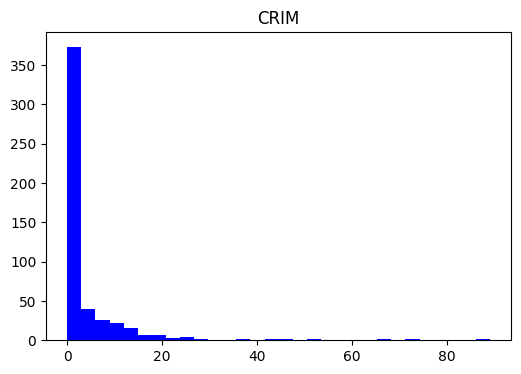

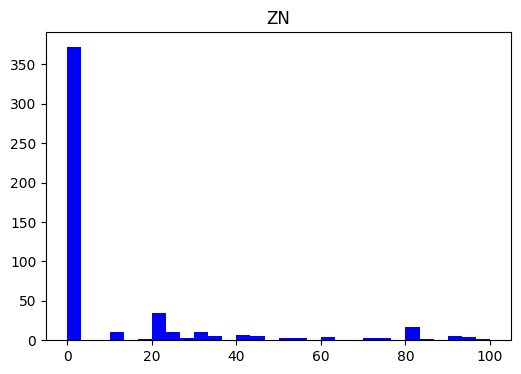

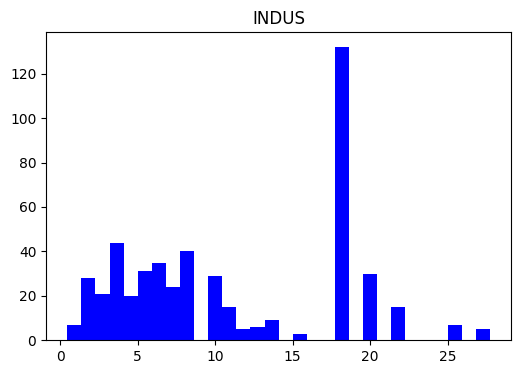

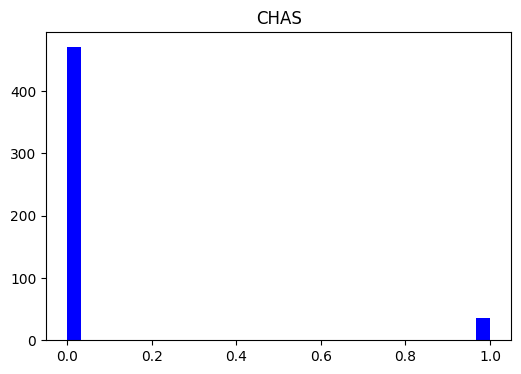

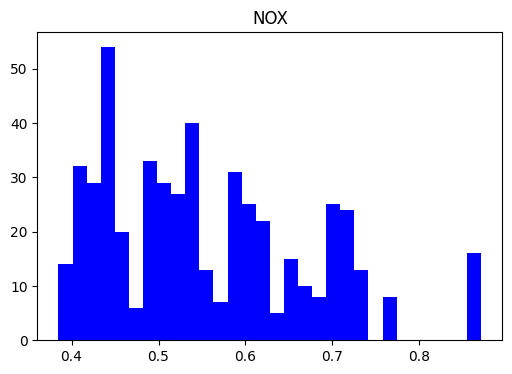

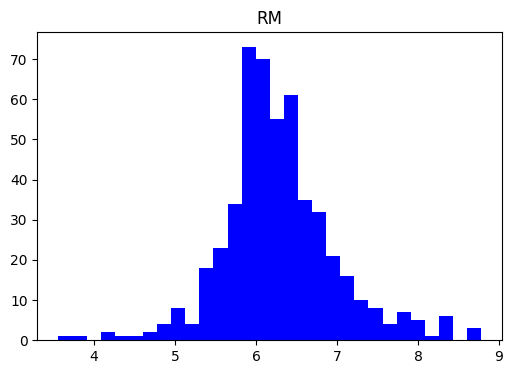

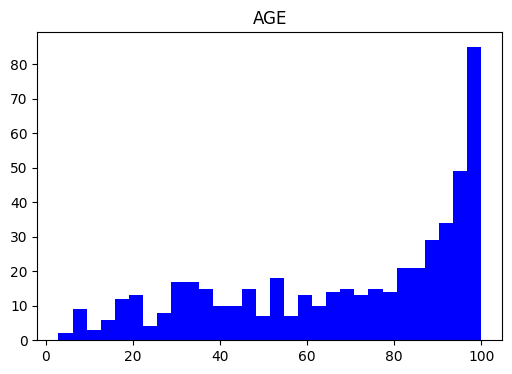

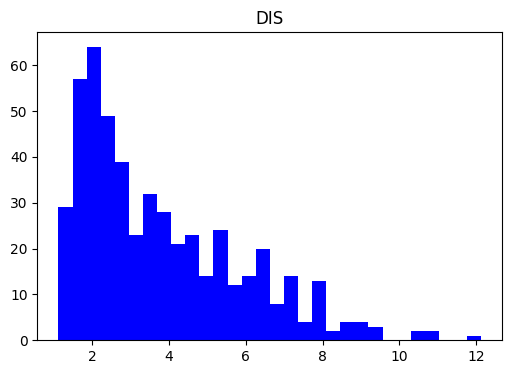

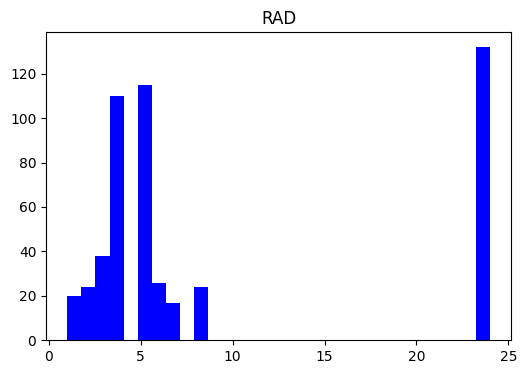

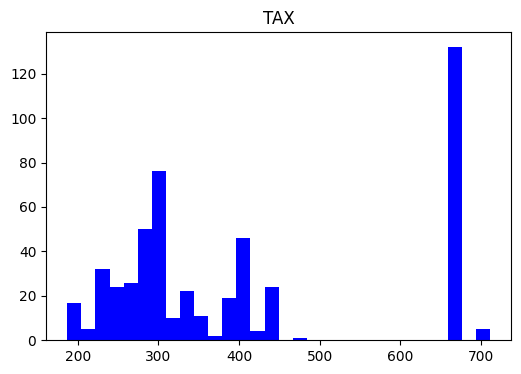

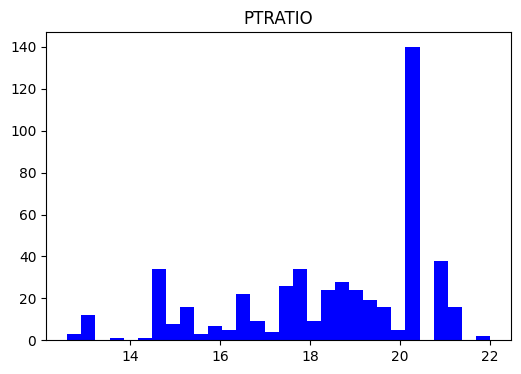

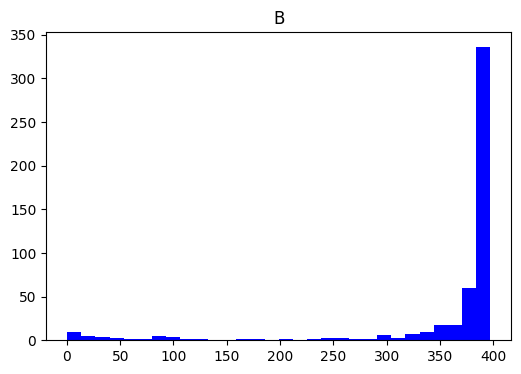

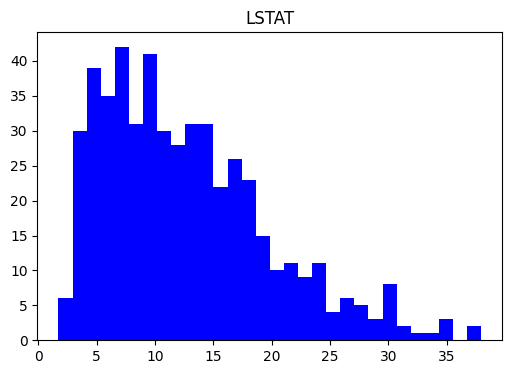

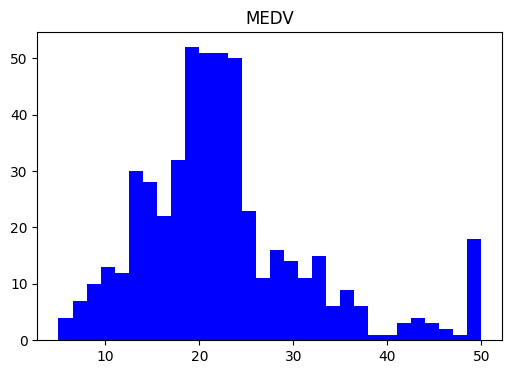

In [ ]:
# Wykresy histogramu każdej z cech
for column in data.columns[:-1]:
  plt.figure(figsize=(6,4))
  plt.hist(data[column], bins=30, color='blue')
  plt.title(column)
  plt.show()

Wnioski: Histogramy cech tworzymy żeby móc zwizualizować sobie to jak rozkładają się wartości w poszczególnych cechach. Ciekawstką jest tu np cecha CHAS po której można zauważyć że ma rozkład binarny (przyjmuje tylko 1 lub 0)

### Outlierzy

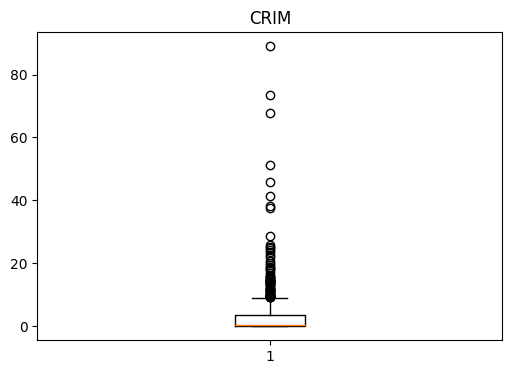

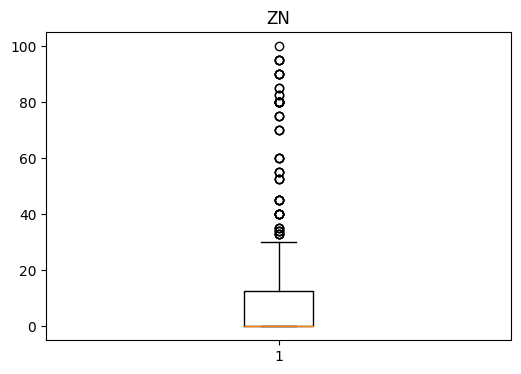

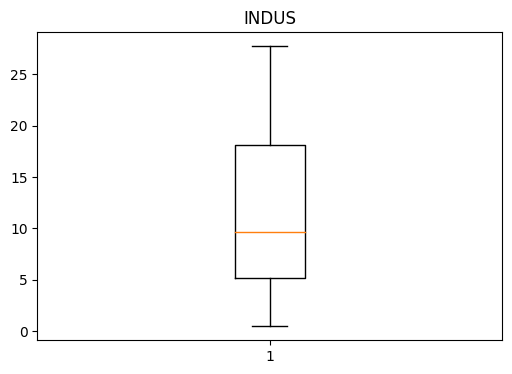

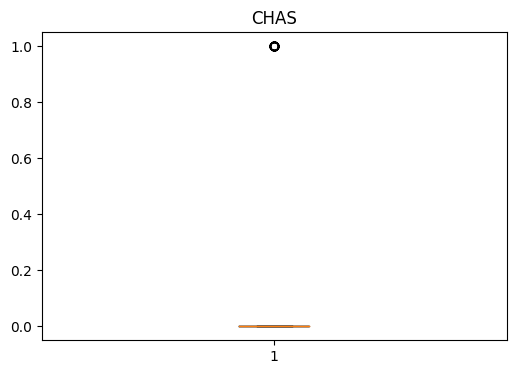

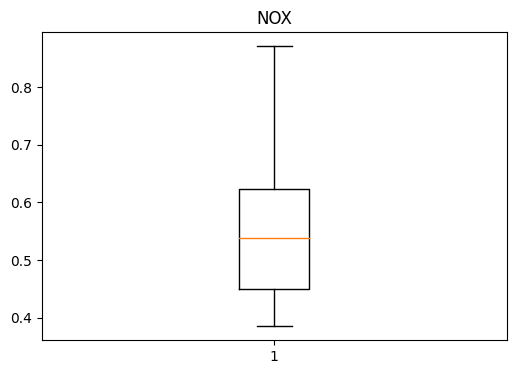

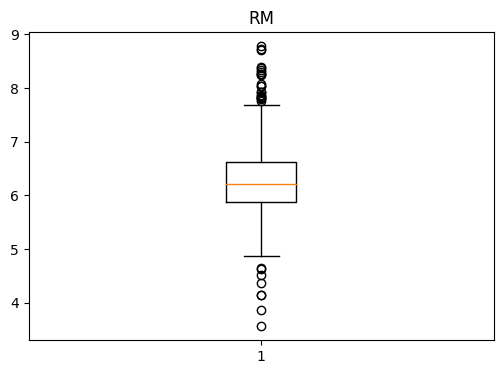

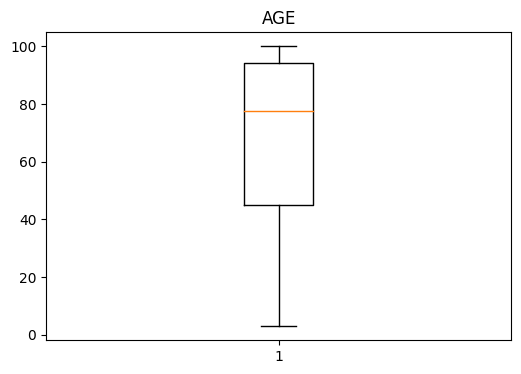

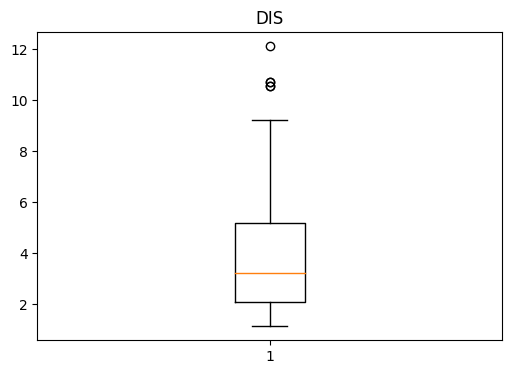

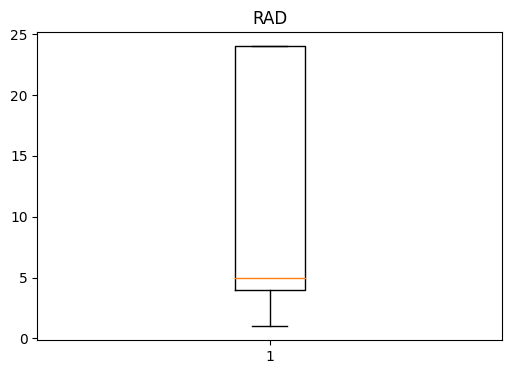

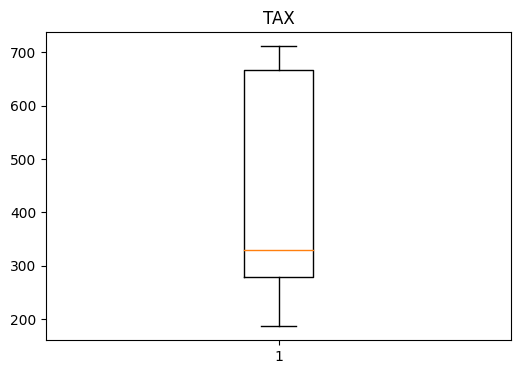

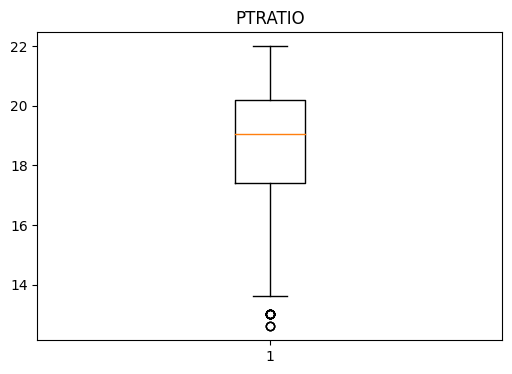

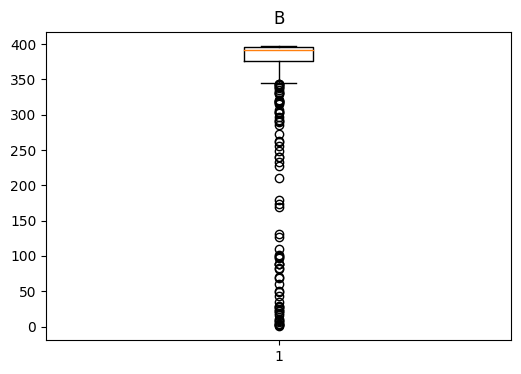

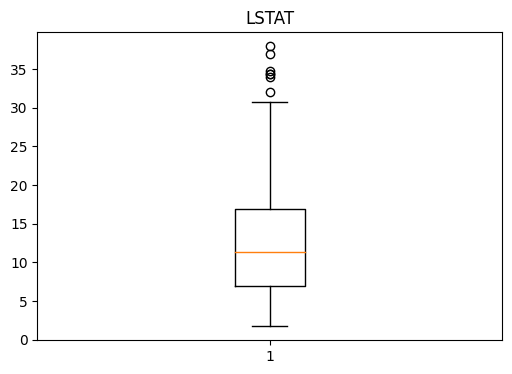

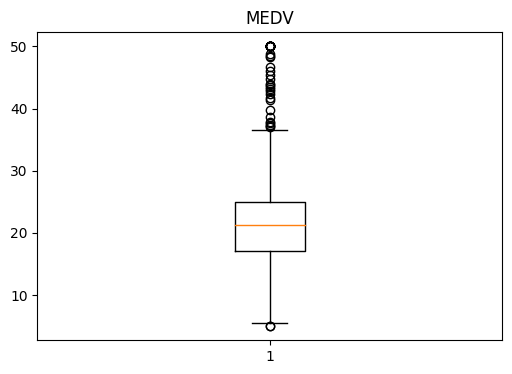

In [ ]:
# Identyfikacja outlierów(wartości odstających dla każdej z cech)
for column in data.columns[:-1]:
  plt.figure(figsize=(6,4))
  plt.boxplot(data[column])
  plt.title(column)
  plt.show()

Wnioski: Wykresy pudełkowe pozwalają nam zobaczyć rozkład cech, pokazując kwartyle, medianę i wartości odstajaće. Stosuje się go w celu zidentyfikowaniu outlierów. Są to wartości silnie odstające od średniej które mogą zaburzać wydajność naszego modelu dlatego czasem decyduje się na ich elminacje w celu poprawy jakości. Przykładem takich cech z dużą ilością outlierów tutaj mogą być CRIM lub RM

### Korelacje pomiędzy cechami a ceną

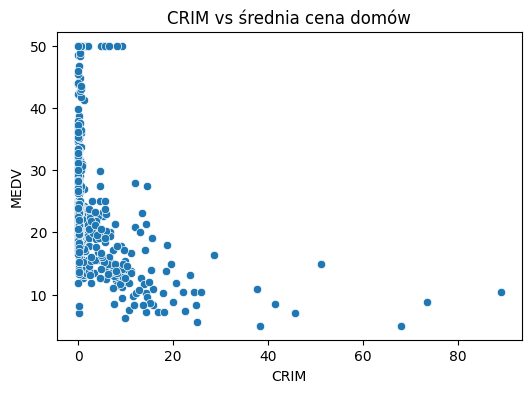

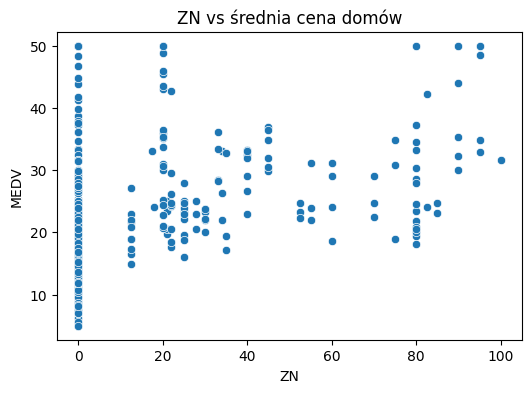

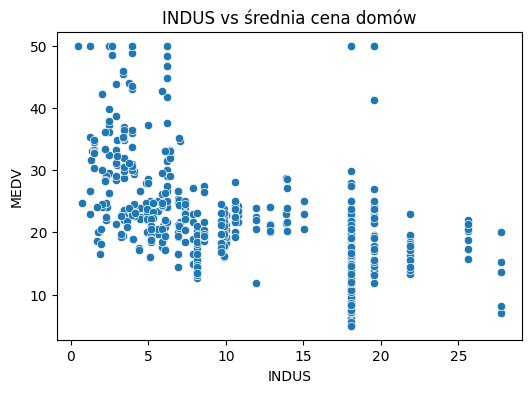

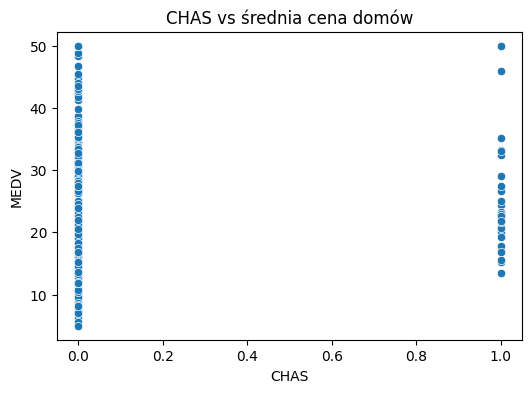

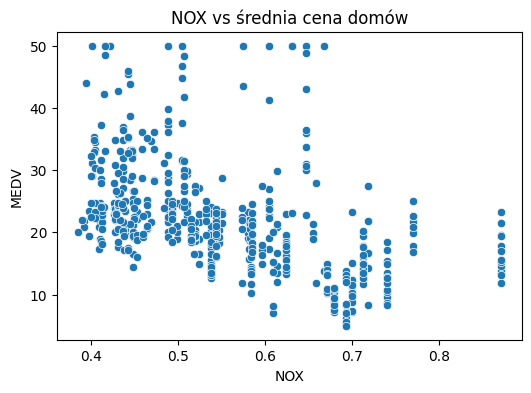

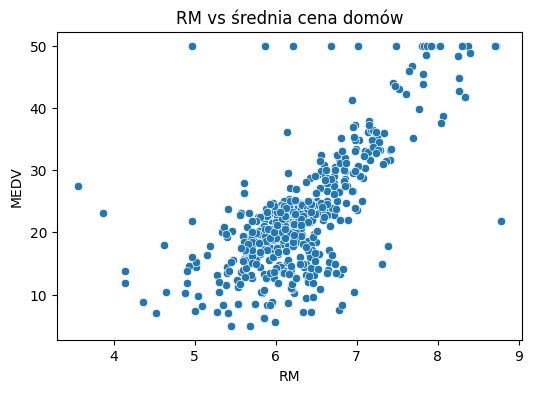

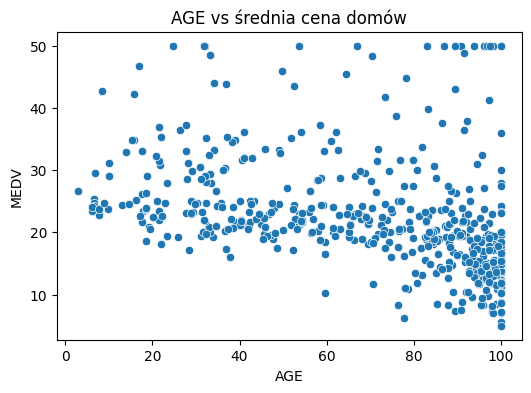

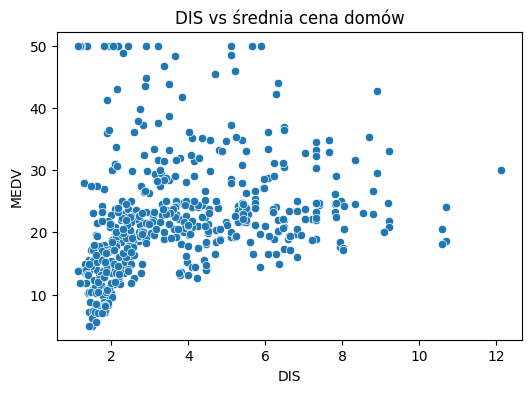

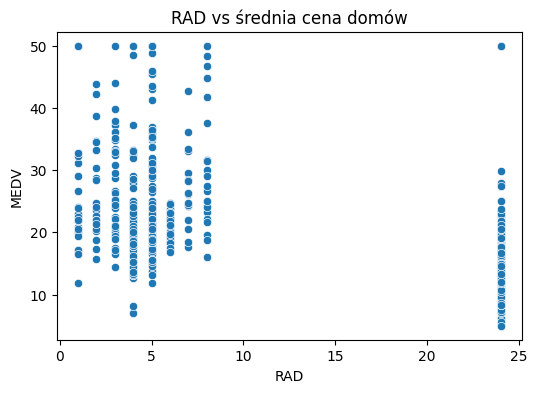

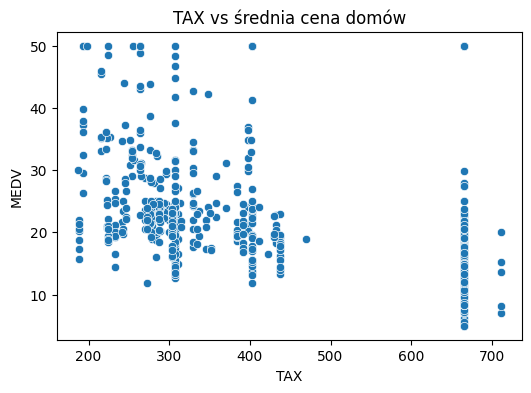

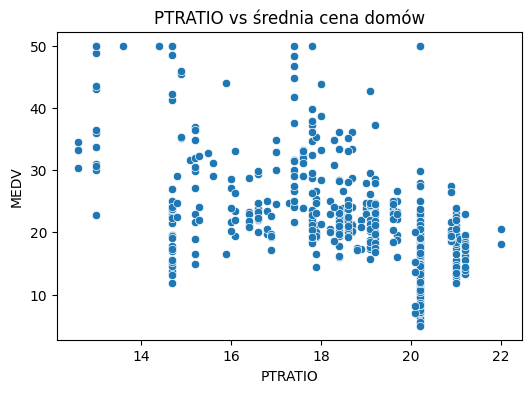

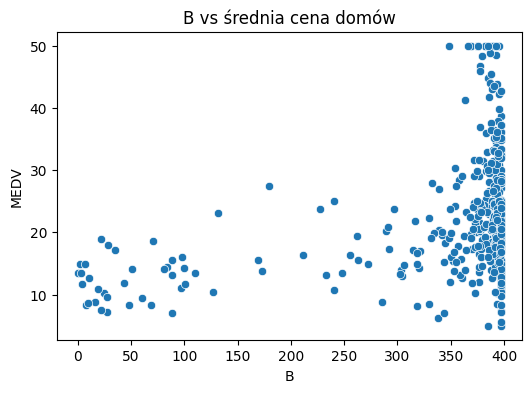

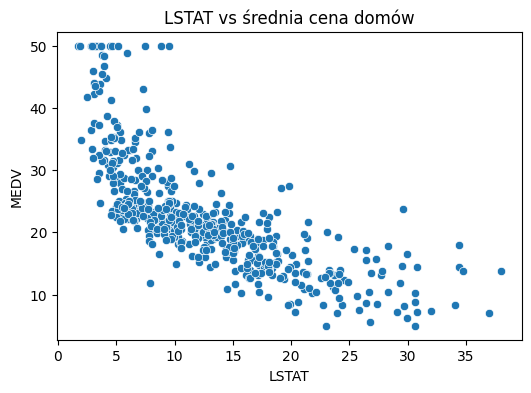

In [ ]:
# Wykres korelacji pomiędzy cechą a ceną domu
for column in data.columns[:13]:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x=data[column], y=data['MEDV'])
  plt.title(f'{column} vs średnia cena domów')
  plt.xlabel(f'{column}')
  plt.ylabel('MEDV')
  plt.show()

Wnioski:
Na niektórych wykresach można zauważyć punkty rozkładające się podobnie do funkcji liniowej może oznaczać to liniową zależność dwóch cech. Takie cechy są pożądane i wpływają w większym stopniu na poprawność wytrenowania modelu Korelacja może być pozytywna bądź negatywna w zależności w jakim kierunku biegnie "linia". Dwie cechy dla których ta zależność jest najbardziej widoczna to silna roznąca zależność dla RM i silna malejąca zależność dla LSTAT





### Macierz korelacji

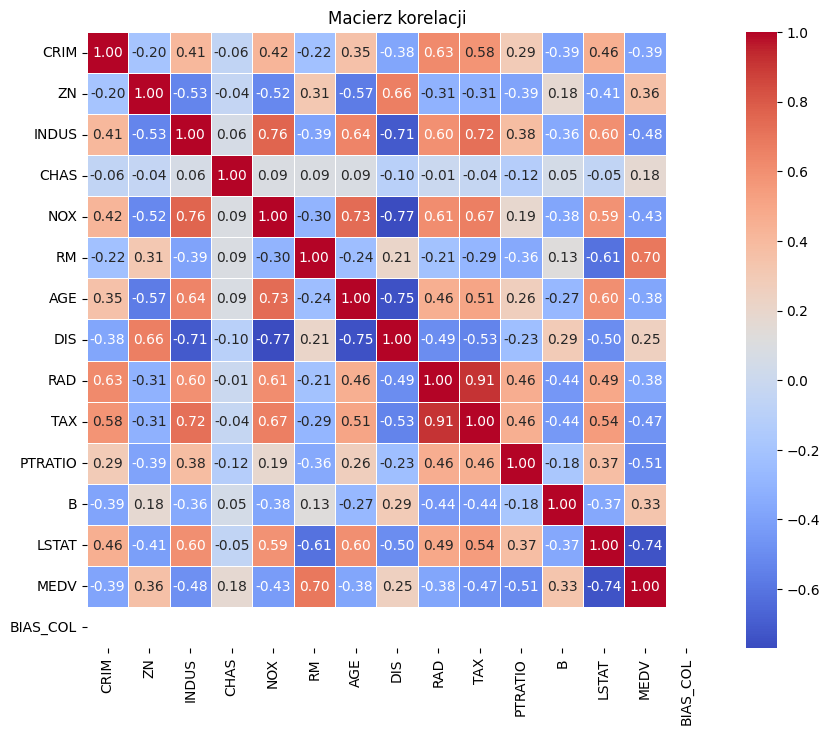

In [ ]:
# Stworzenie macierzy korelacji między cechami
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

Wnioski: Macierz korelacji pozwala nam sprawdzić jak zmiany poszczególnych cech wpływają na siebie nawzajem, im bliżej do jedynki tym dana cecha ma silniejszą korelację pozytywną a im bliżej do -1 tym silniejsza negatywna korelacja, wartości bliskie 0 wskazują na brak zależności między cechami. Na podstawie korelacji wybierane są cechy wykorzystane do trenowania modelu zależy nam na cechach z silnymi korelacjami (negatywnymi lub pozytywnymi) natomiast te bliskie 0 często się wyklucza. Taką cechą jest tu np CHAS który praktycznie z każdą cechą wykazuje bliską 0 korelacje

## Przygotowanie danych

### Elminacja outlierow

In [ ]:
# Wyznaczenie 1 i 3 Kwartyla dla metody IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

## Usuwamy otlierow, bierzemy tylko te dane ktore znajduja sie miedzy 1 a 3 kwartylem
outlier_condition = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 +1.5 * IQR)))
data = data[~outlier_condition.any(axis=1)]

### Podział na dane wynikowe i cechy

In [ ]:
# Przypisanie cech wykorzytsanych do trenowania do zmiennej X
X = data.drop('MEDV', axis=1)
# Przypisanie wyników do zmiennej Y
y = data.iloc[:, 13].values

### Standaryzacja danych

In [ ]:
# Utworzenie obiektu scalera i standaryzacja danych żeby uniknąć zbyt dużych wag
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Podział danych na uczące i testowe

In [ ]:
# Podział na dane trenujące i testowe proporcja 70:30 z przetsowaniem danych
# Dodanie random seed żeby zapewnić powtarzalność wyników
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Dane z wszystkimi kolumnami
X1_train = X_train
X1_test = X_test

# Dane z najlepszymi kolumnami na podstawie wcześniejszej analizy
# Kryterium największe korelacje z MEDC: ('LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX','NOX')
X2_train = X_train[:,[2, 4, 5, 9, 10, 12]]
X2_test = X_test[:,[2, 4, 5, 9, 10, 12]]

# Trenowanie modeli


## Regresja liniowa

### Trenowanie modelu

In [ ]:
# Trenowanie modelu dla wszystkich kolumn
lr1 = LinearRegression()
lr1.fit(X1_train, y_train)

LinearRegression()

In [ ]:
# Trenowanie modelu dla wybranych kolumn
lr2 = LinearRegression()
lr2.fit(X2_train, y_train)

LinearRegression()

### Ocena modelu

In [ ]:
# Mean absolute error
mae_train1_linear = mean_absolute_error(y_train, lr1.predict(X1_train))
mae_test1_linear = mean_absolute_error(y_test, lr1.predict(X1_test))

mae_train2_linear = mean_absolute_error(y_train, lr2.predict(X2_train))
mae_test2_linear = mean_absolute_error(y_test, lr2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {mae_train1_linear}, dla danych testowych: {mae_test1_linear}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {mae_train2_linear}, dla danych testowych: {mae_test2_linear}")

Wszystkie kolumny: Błąd dla danych trenujących: 1.7489918760456467, dla danych testowych: 2.186192903365379
Wybrane kolumny: Błąd dla danych trenujących: 1.9270852352272914, dla danych testowych: 2.5109533245327387


In [ ]:
# Mean squared error
mse_train1_linear = mean_squared_error(y_train, lr1.predict(X1_train))
mse_test1_linear = mean_squared_error(y_test, lr1.predict(X1_test))

mse_train2_linear = mean_squared_error(y_train, lr2.predict(X2_train))
mse_test2_linear = mean_squared_error(y_test, lr2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {mse_train1_linear}, dla danych testowych: {mse_test1_linear}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {mse_train2_linear}, dla danych testowych: {mse_test2_linear}")

Wszystkie kolumny: Błąd dla danych trenujących: 5.383627532794197, dla danych testowych: 8.802278058144521
Wybrane kolumny: Błąd dla danych trenujących: 6.348209146165513, dla danych testowych: 12.311846857388778


In [ ]:
# R2 score
r2_train1_linear = r2_score(y_train, lr1.predict(X1_train))
r2_test1_linear = r2_score(y_test, lr1.predict(X1_test))

r2_train2_linear = r2_score(y_train, lr2.predict(X2_train))
r2_test2_linear = r2_score(y_test, lr2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {r2_train1_linear}, dla danych testowych: {r2_test1_linear}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {r2_train2_linear}, dla danych testowych: {r2_test2_linear}")

Wszystkie kolumny: Błąd dla danych trenujących: 0.7462186017161414, dla danych testowych: 0.637174735638829
Wybrane kolumny: Błąd dla danych trenujących: 0.7007487267834637, dla danych testowych: 0.49251215863680986


## Drzewa decyzyjne

### Trenowanie modelu

In [ ]:
# Trenowanie modelu dla wszystkich kolumn
tree1 = DecisionTreeRegressor(max_depth=5)
tree1.fit(X1_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
#Trenowanie modelu dla wybanych kolumn
tree2 = DecisionTreeRegressor(max_depth=5)
tree2.fit(X2_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Ocena modelu

In [ ]:
# Mean absolute error
mae_train1_tree = mean_absolute_error(y_train, tree1.predict(X1_train))
mae_test1_tree = mean_absolute_error(y_test, tree1.predict(X1_test))

mae_train2_tree = mean_absolute_error(y_train, tree2.predict(X2_train))
mae_test2_tree = mean_absolute_error(y_test, tree2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {mae_train1_tree}, dla danych testowych: {mae_test1_tree}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {mae_train2_tree}, dla danych testowych: {mae_test2_tree}")

Wszystkie kolumny: Błąd dla danych trenujących: 1.1236261585980079, dla danych testowych: 2.7651675744069735
Wybrane kolumny: Błąd dla danych trenujących: 1.1726689161969148, dla danych testowych: 2.4312814245486023


In [ ]:
# Mean squared error
mse_train1_tree = mean_squared_error(y_train, tree1.predict(X1_train))
mse_test1_tree = mean_squared_error(y_test, tree1.predict(X1_test))

mse_train2_tree = mean_squared_error(y_train, tree2.predict(X2_train))
mse_test2_tree = mean_squared_error(y_test, tree2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {mse_train1_tree}, dla danych testowych: {mse_test1_tree}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {mse_train2_tree}, dla danych testowych: {mse_test2_tree}")

Wszystkie kolumny: Błąd dla danych trenujących: 2.1110731434070646, dla danych testowych: 13.683669524058955
Wybrane kolumny: Błąd dla danych trenujących: 2.339446511349283, dla danych testowych: 12.031258797961156


In [ ]:
# R2 score
r2_train1_tree = r2_score(y_train, tree1.predict(X1_train))
r2_test1_tree = r2_score(y_test, tree1.predict(X1_test))

r2_train2_tree = r2_score(y_train, tree2.predict(X2_train))
r2_test2_tree = r2_score(y_test, tree2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {r2_train1_tree}, dla danych testowych: {r2_test1_tree}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {r2_train2_tree}, dla danych testowych: {r2_test2_tree}")

Wszystkie kolumny: Błąd dla danych trenujących: 0.9004851113956465, dla danych testowych: 0.4359663510170749
Wybrane kolumny: Błąd dla danych trenujących: 0.8897197097600155, dla danych testowych: 0.5040778506276711


## Elastic Model

### Regularyzacja hiperparametrów

In [ ]:
# Trenowanie modelu dla wszytkich kolumn
elastic_net = ElasticNetCV(alphas=[0.1, 0.5, 1.0], l1_ratio=[0.1, 0.5, 0.9])

# Dopasowanie modelu do danych treningowych
elastic_net.fit(X1_train, y_train)

# Wypisanie najlepszych parametrów
print("Najlepszy współczynnik alpha:", elastic_net.alpha_)
print("Najlepszy współczynnik l1_ratio:", elastic_net.l1_ratio_)
alpha = elastic_net.alpha_
ratio = elastic_net.l1_ratio_

Najlepszy współczynnik alpha: 0.1
Najlepszy współczynnik l1_ratio: 0.1


### Trenowanie modelu

In [ ]:
# Trebowanie modelu dla wybranych kolumn
er1 = ElasticNet(alpha=alpha, l1_ratio=ratio)
er1.fit(X1_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [ ]:
# Trebowanie modelu dla wybranych kolumn
er2 = ElasticNet(alpha=alpha, l1_ratio=ratio)
er2.fit(X2_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

### Ocena modelu

In [ ]:
# Mean absolute error
mae_train1_elastic = mean_absolute_error(y_train, er1.predict(X1_train))
mae_test1_elastic = mean_absolute_error(y_test, er1.predict(X1_test))

mae_train2_elastic = mean_absolute_error(y_train, er2.predict(X2_train))
mae_test2_elastic = mean_absolute_error(y_test, er2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {mae_train1_elastic}, dla danych testowych: {mae_test1_elastic}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {mae_train2_elastic}, dla danych testowych: {mae_test2_elastic}")

Wszystkie kolumny: Błąd dla danych trenujących: 1.827829074404198, dla danych testowych: 2.256565637029699
Wybrane kolumny: Błąd dla danych trenujących: 1.9409664905344037, dla danych testowych: 2.4921704693919042


In [ ]:
# Mean squared error
mse_train1_elastic = mean_squared_error(y_train, er1.predict(X1_train))
mse_test1_elastic = mean_squared_error(y_test, er1.predict(X1_test))

mse_train2_elastic = mean_squared_error(y_train, er2.predict(X2_train))
mse_test2_elastic = mean_squared_error(y_test, er2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {mse_train1_elastic}, dla danych testowych: {mse_test1_elastic}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {mse_train2_elastic}, dla danych testowych: {mse_test2_elastic}")

Wszystkie kolumny: Błąd dla danych trenujących: 5.680121138685808, dla danych testowych: 9.889043395621592
Wybrane kolumny: Błąd dla danych trenujących: 6.4047373107630134, dla danych testowych: 12.093284394105195


In [ ]:
# R2 score
r2_train1_elastic = r2_score(y_train, er1.predict(X1_train))
r2_test1_elastic = r2_score(y_test, er1.predict(X1_test))

r2_train2_elastic = r2_score(y_train, er2.predict(X2_train))
r2_test2_elastic = r2_score(y_test, er2.predict(X2_test))

print(f"Wszystkie kolumny: Błąd dla danych trenujących: {r2_train1_elastic}, dla danych testowych: {r2_test1_elastic}")
print(f"Wybrane kolumny: Błąd dla danych trenujących: {r2_train2_elastic}, dla danych testowych: {r2_test2_elastic}")

Wszystkie kolumny: Błąd dla danych trenujących: 0.7322420475383038, dla danych testowych: 0.5923788409551982
Wybrane kolumny: Błąd dla danych trenujących: 0.6980840185423034, dla danych testowych: 0.5015211882307933


# Porownanie modeli i wnioski

## Porownanie modeli

### Porownanie modeli dla wszystkich kolumn

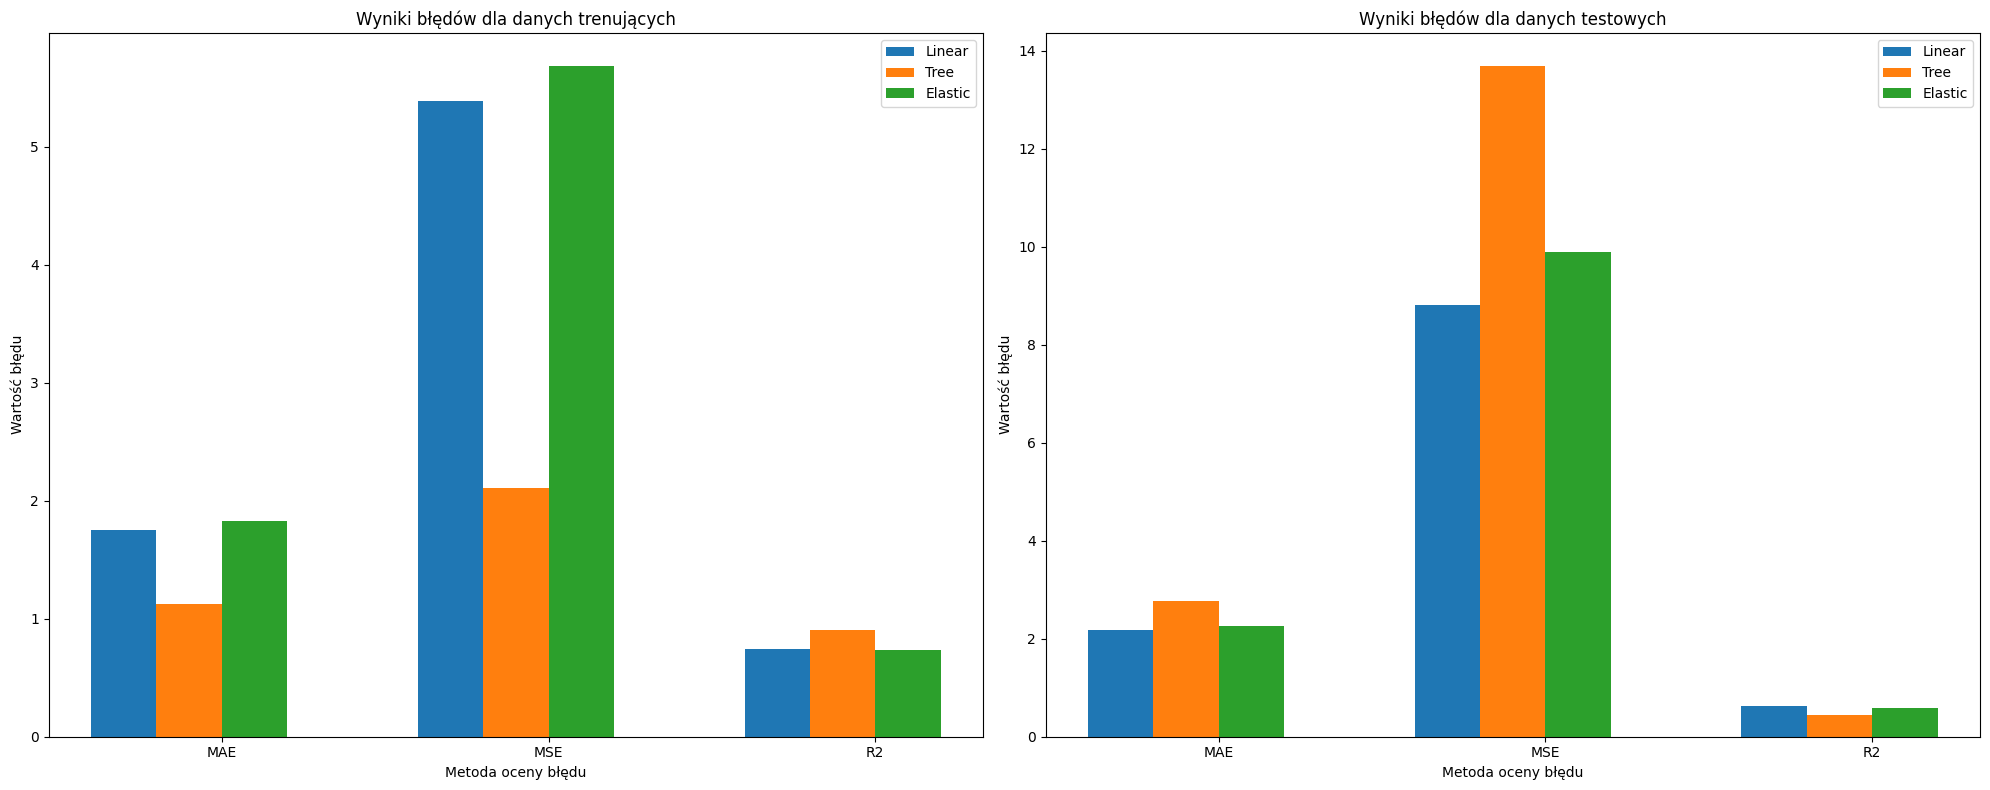

In [ ]:
# Przygotowanie danych pod wykres
model_names = ['Linear', 'Tree', 'Elastic']
evaluation_methods = ['MAE', 'MSE', 'R2']
data_types = ['Train', 'Test']
errors = {
    'Linear': {'MAE': [mae_train1_linear, mae_test1_linear], 'MSE': [mse_train1_linear, mse_test1_linear], 'R2': [r2_train1_linear, r2_test1_linear]},
    'Tree': {'MAE': [mae_train1_tree, mae_test1_tree], 'MSE': [mse_train1_tree, mse_test1_tree], 'R2': [r2_train1_tree, r2_test1_tree]},
    'Elastic': {'MAE': [mae_train1_elastic, mae_test1_elastic], 'MSE': [mse_train1_elastic, mse_test1_elastic], 'R2': [r2_train1_elastic, r2_test1_elastic]}
}

# Stworzenie 2 wykresow dla danych trenujacych i testowych
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

bar_width = 0.2
index = np.arange(len(evaluation_methods))

for i, data_type in enumerate(data_types):
    for j, model_name in enumerate(model_names):
        errors_values = [errors[model_name][method][i] for method in evaluation_methods]
        axs[i].bar(index + j * bar_width, errors_values, bar_width, label=model_name)

# Konfiguracja osi dla wykresu danych trenujących
axs[0].set_xlabel('Metoda oceny błędu')
axs[0].set_ylabel('Wartość błędu')
axs[0].set_title('Wyniki błędów dla danych trenujących')
axs[0].set_xticks(index + 0.5 * bar_width * len(model_names))
axs[0].set_xticklabels(evaluation_methods)
axs[0].legend()

# Konfiguracja osi dla wykresu danych testowych
axs[1].set_xlabel('Metoda oceny błędu')
axs[1].set_ylabel('Wartość błędu')
axs[1].set_title('Wyniki błędów dla danych testowych')
axs[1].set_xticks(index + 0.5 * bar_width * len(model_names))
axs[1].set_xticklabels(evaluation_methods)
axs[1].legend()

plt.tight_layout()
plt.show()

### Porownanie modeli dla wybranych kolumn

In [ ]:
# Przygotowanie danych pod wykresmodel_names = ['Linear', 'Tree', 'Elastic']
evaluation_methods = ['MAE', 'MSE', 'R2']
data_types = ['Train', 'Test']
errors = {
    'Linear': {'MAE': [mae_train2_linear, mae_test2_linear], 'MSE': [mse_train2_linear, mse_test2_linear], 'R2': [r2_train2_linear, r2_test2_linear]},
    'Tree': {'MAE': [mae_train2_tree, mae_test2_tree], 'MSE': [mse_train2_tree, mse_test2_tree], 'R2': [r2_train2_tree, r2_test2_tree]},
    'Elastic': {'MAE': [mae_train2_elastic, mae_test2_elastic], 'MSE': [mse_train2_elastic, mse_test2_elastic], 'R2': [r2_train2_elastic, r2_test2_elastic]}
}

# Stworzenie 2 wykresow dla danych trenujacych i testowych

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

bar_width = 0.2
index = np.arange(len(evaluation_methods))

for i, data_type in enumerate(data_types):
    for j, model_name in enumerate(model_names):
        errors_values = [errors[model_name][method][i] for method in evaluation_methods]
        axs[i].bar(index + j * bar_width, errors_values, bar_width, label=model_name)

# Konfiguracja osi dla wykresu danych trenujących
axs[0].set_xlabel('Metoda oceny błędu')
axs[0].set_ylabel('Wartość błędu')
axs[0].set_title('Wyniki błędów dla danych trenujących')
axs[0].set_xticks(index + 0.5 * bar_width * len(model_names))
axs[0].set_xticklabels(evaluation_methods)
axs[0].legend()

# Konfiguracja osi dla wykresu danych testowych
axs[1].set_xlabel('Metoda oceny błędu')
axs[1].set_ylabel('Wartość błędu')
axs[1].set_title('Wyniki błędów dla danych testowych')
axs[1].set_xticks(index + 0.5 * bar_width * len(model_names))
axs[1].set_xticklabels(evaluation_methods)
axs[1].legend()

plt.tight_layout()
plt.show()

### Wnisoki

Dla danych trenujących najmniejszym błędem wykazuje się regresja drzew decyzyjnych, ale zmienia się to dla danych testowych co może wskazywać na to że mamy do czynienia z przetrenowaniem modelu, Nalezy tu podkreslic ze w ocenie modelu im wieksze wartosci tym lepiej (im bardziej zbliżone do 1 tym lepiej). Ciekawy jest model elastic któy jest defacto ulepszonym modelem liniowym z współczynnikami regularyzacji kar (Ridge plus LASSO) lecz wykazuje się tutaj lekko większym błędem niż zwykły model liniowy. Należałoby poświęcić tu większą wagę na dopasowanie parametrów Ratio i alpha dla modelu elastic

## Porownanie zestawu danych

In [ ]:
evaluation_methods = ['MAE', 'MSE', 'R2']
errors1 = {
    'Linear': {'MAE': mae_train1_linear, 'MSE': mse_train1_linear, 'R2': r2_train1_linear},
    'Tree': {'MAE': mae_train1_tree, 'MSE': mse_train1_tree, 'R2': r2_train1_tree},
    'Elastic': {'MAE': mae_train1_elastic, 'MSE': mse_train1_elastic, 'R2': r2_train1_elastic}
}
errors2 = {
    'Linear': {'MAE': mae_train2_linear, 'MSE': mse_train2_linear, 'R2': r2_train2_linear},
    'Tree': {'MAE': mae_train2_tree, 'MSE': mse_train2_tree, 'R2': r2_train2_tree},
    'Elastic': {'MAE': mae_train2_elastic, 'MSE': mse_train2_elastic, 'R2': r2_train2_elastic}
}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

bar_width = 0.35
index = np.arange(len(evaluation_methods))

for i, method in enumerate(evaluation_methods):
    # Pobieranie wyników błędów dla modeli dla errors1 i errors2
    errors_values1 = [errors1[model][method] for model in errors1.keys()]
    errors_values2 = [errors2[model][method] for model in errors2.keys()]

    # Tworzenie słupków dla zestawu modeli 1
    axs[i].bar(index, errors_values1, bar_width, label='Wszystkie kolumny')
    # Tworzenie słupków dla zestawu modeli 2 przesuniętych o szerokość słupka
    axs[i].bar(index + bar_width, errors_values2, bar_width, label='Wybrane kolumny')

    axs[i].set_xlabel('Miara błędu')
    axs[i].set_ylabel('Wartość błędu')
    axs[i].set_title(f'Porównanie wyników błędów dla {method}')
    axs[i].set_xticks(index + bar_width / 2)
    axs[i].set_xticklabels(errors1.keys())
    axs[i].legend()

plt.tight_layout()
plt.show()

### Wnioski

Mimo wyboru kolumn które wykazywały największą korelację wszystkie z modelów radziły sobie trochę lepiej kiedy przepuszczaliśmy przez nie wszystkie kolumny co może wskazyważ że mimo iż niektóre kolumny mogą mieć nikły wpływ na ceche wyjściową to dalej są w stanie lekko poprawić skuteczność modelu co zachęca do stosowania jak największej ilośći cech przy trenowaniu modelu

## Wnioski ostateczne

W celu zoptymalizowania danych dokonaliśmy elminacji outlierów a następnie skalowania. Takie dane podzieliśmy na dwa zestawy pierwszy opierający się na wszystkich kolumnach cech drugi tylko na tych wykazujących największe korelacje. Wybraliśmy 3 modele regresji: Liniowy, Drzew decyzyjnych oraz Elastic stanowiący model liniowy z dodatkiem współczynnika kar L1 i L2 z modelu lasso i ridge. Następnie do oceny tych modeli użyliśmy 3 metryk MAE, MSE i R2. MAE mierzy średnią wartość bezwzględną różnic między przewidywanymi wartościami a rzeczywistymi wartościami. MSE mierzy średnią wartość kwadratów różnic między przewidywanymi wartościami a rzeczywistymi wartościami. R2 mierzy proporcję zmienności zmiennej zależnej, która jest wyjaśniana przez model regresji. Z tymi wynikamy porównaliśmy dane na wykresie i wyciągnęliśmy wnioski o tym że dane dla wszystkich kolumn są lepsze niż te dla wybranych, a najlepiej sprawdzał się model drzew decyzyjnych ale tylko dla danych trenujących a w testowych wykazywał przetrenowanie. Do poprawy na pewno dostosowywanie parametrów modeli takich jak maksymalna głębokość w przypadku drzew decyzyjnych czy alpha i ratio w modelu elastic